<a href="https://colab.research.google.com/github/AndresUrregoAngel/BdeB_ml_project/blob/main/exploration/DataAnalyst_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AndresUrregoAngel/CBB/master/AI/data/heart_failure_clinical_records_dataset.csv")

# Vizualisation and data exploration

In [2]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


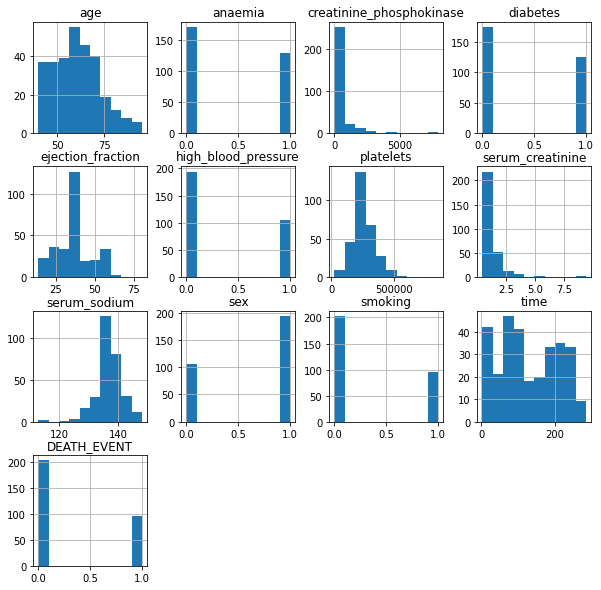

In [4]:
from matplotlib import pyplot as plt
df_nums = df.select_dtypes(include=['number'])
df_nums.hist(figsize=(10,10))
plt.show()

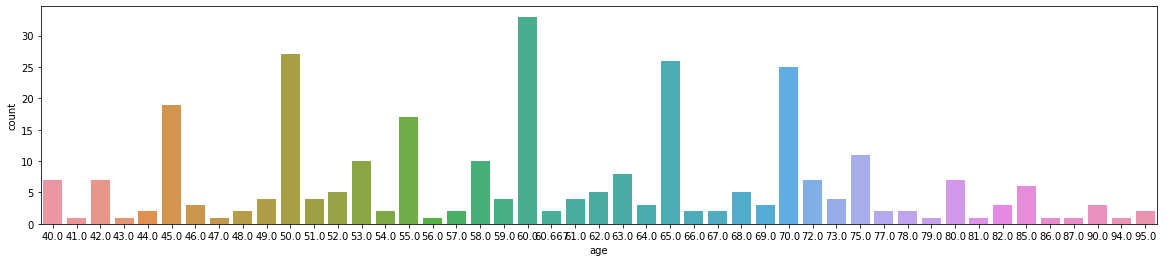

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df_floats = df.select_dtypes(include=['float64'])
plt.figure(figsize=(20,4))
sns.countplot(data=df_floats,x="age")
plt.show()

<function matplotlib.pyplot.show>

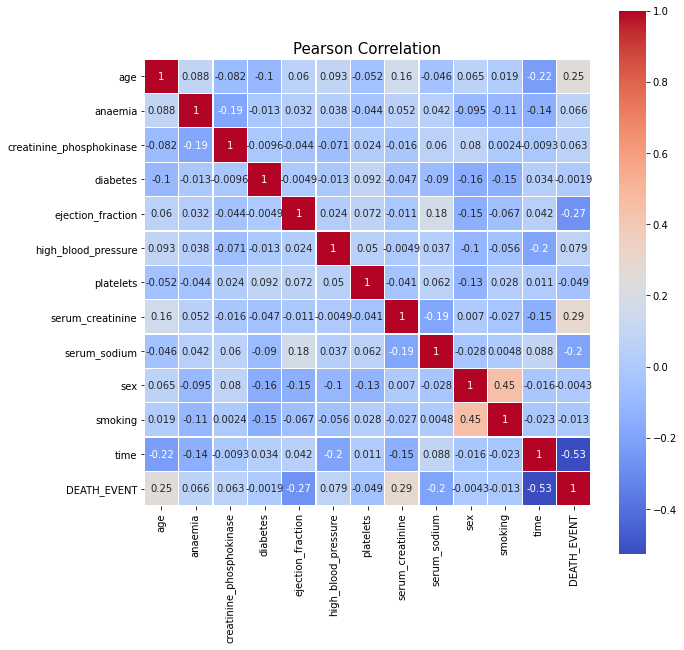

In [6]:
corr = df.corr()
# sns.pairplot(df,height=3,diag_kind='kde',hue='DEATH_EVENT')
f, ax = plt.subplots(figsize=(10,10))
camp= sns.diverging_palette(220,10 ,as_cmap=True)
_ = sns.heatmap(corr, cmap="coolwarm",square=True, ax=ax,annot=True,linewidth=0.1)
plt.title("Pearson Correlation",y=1.05,size=15)
plt.show

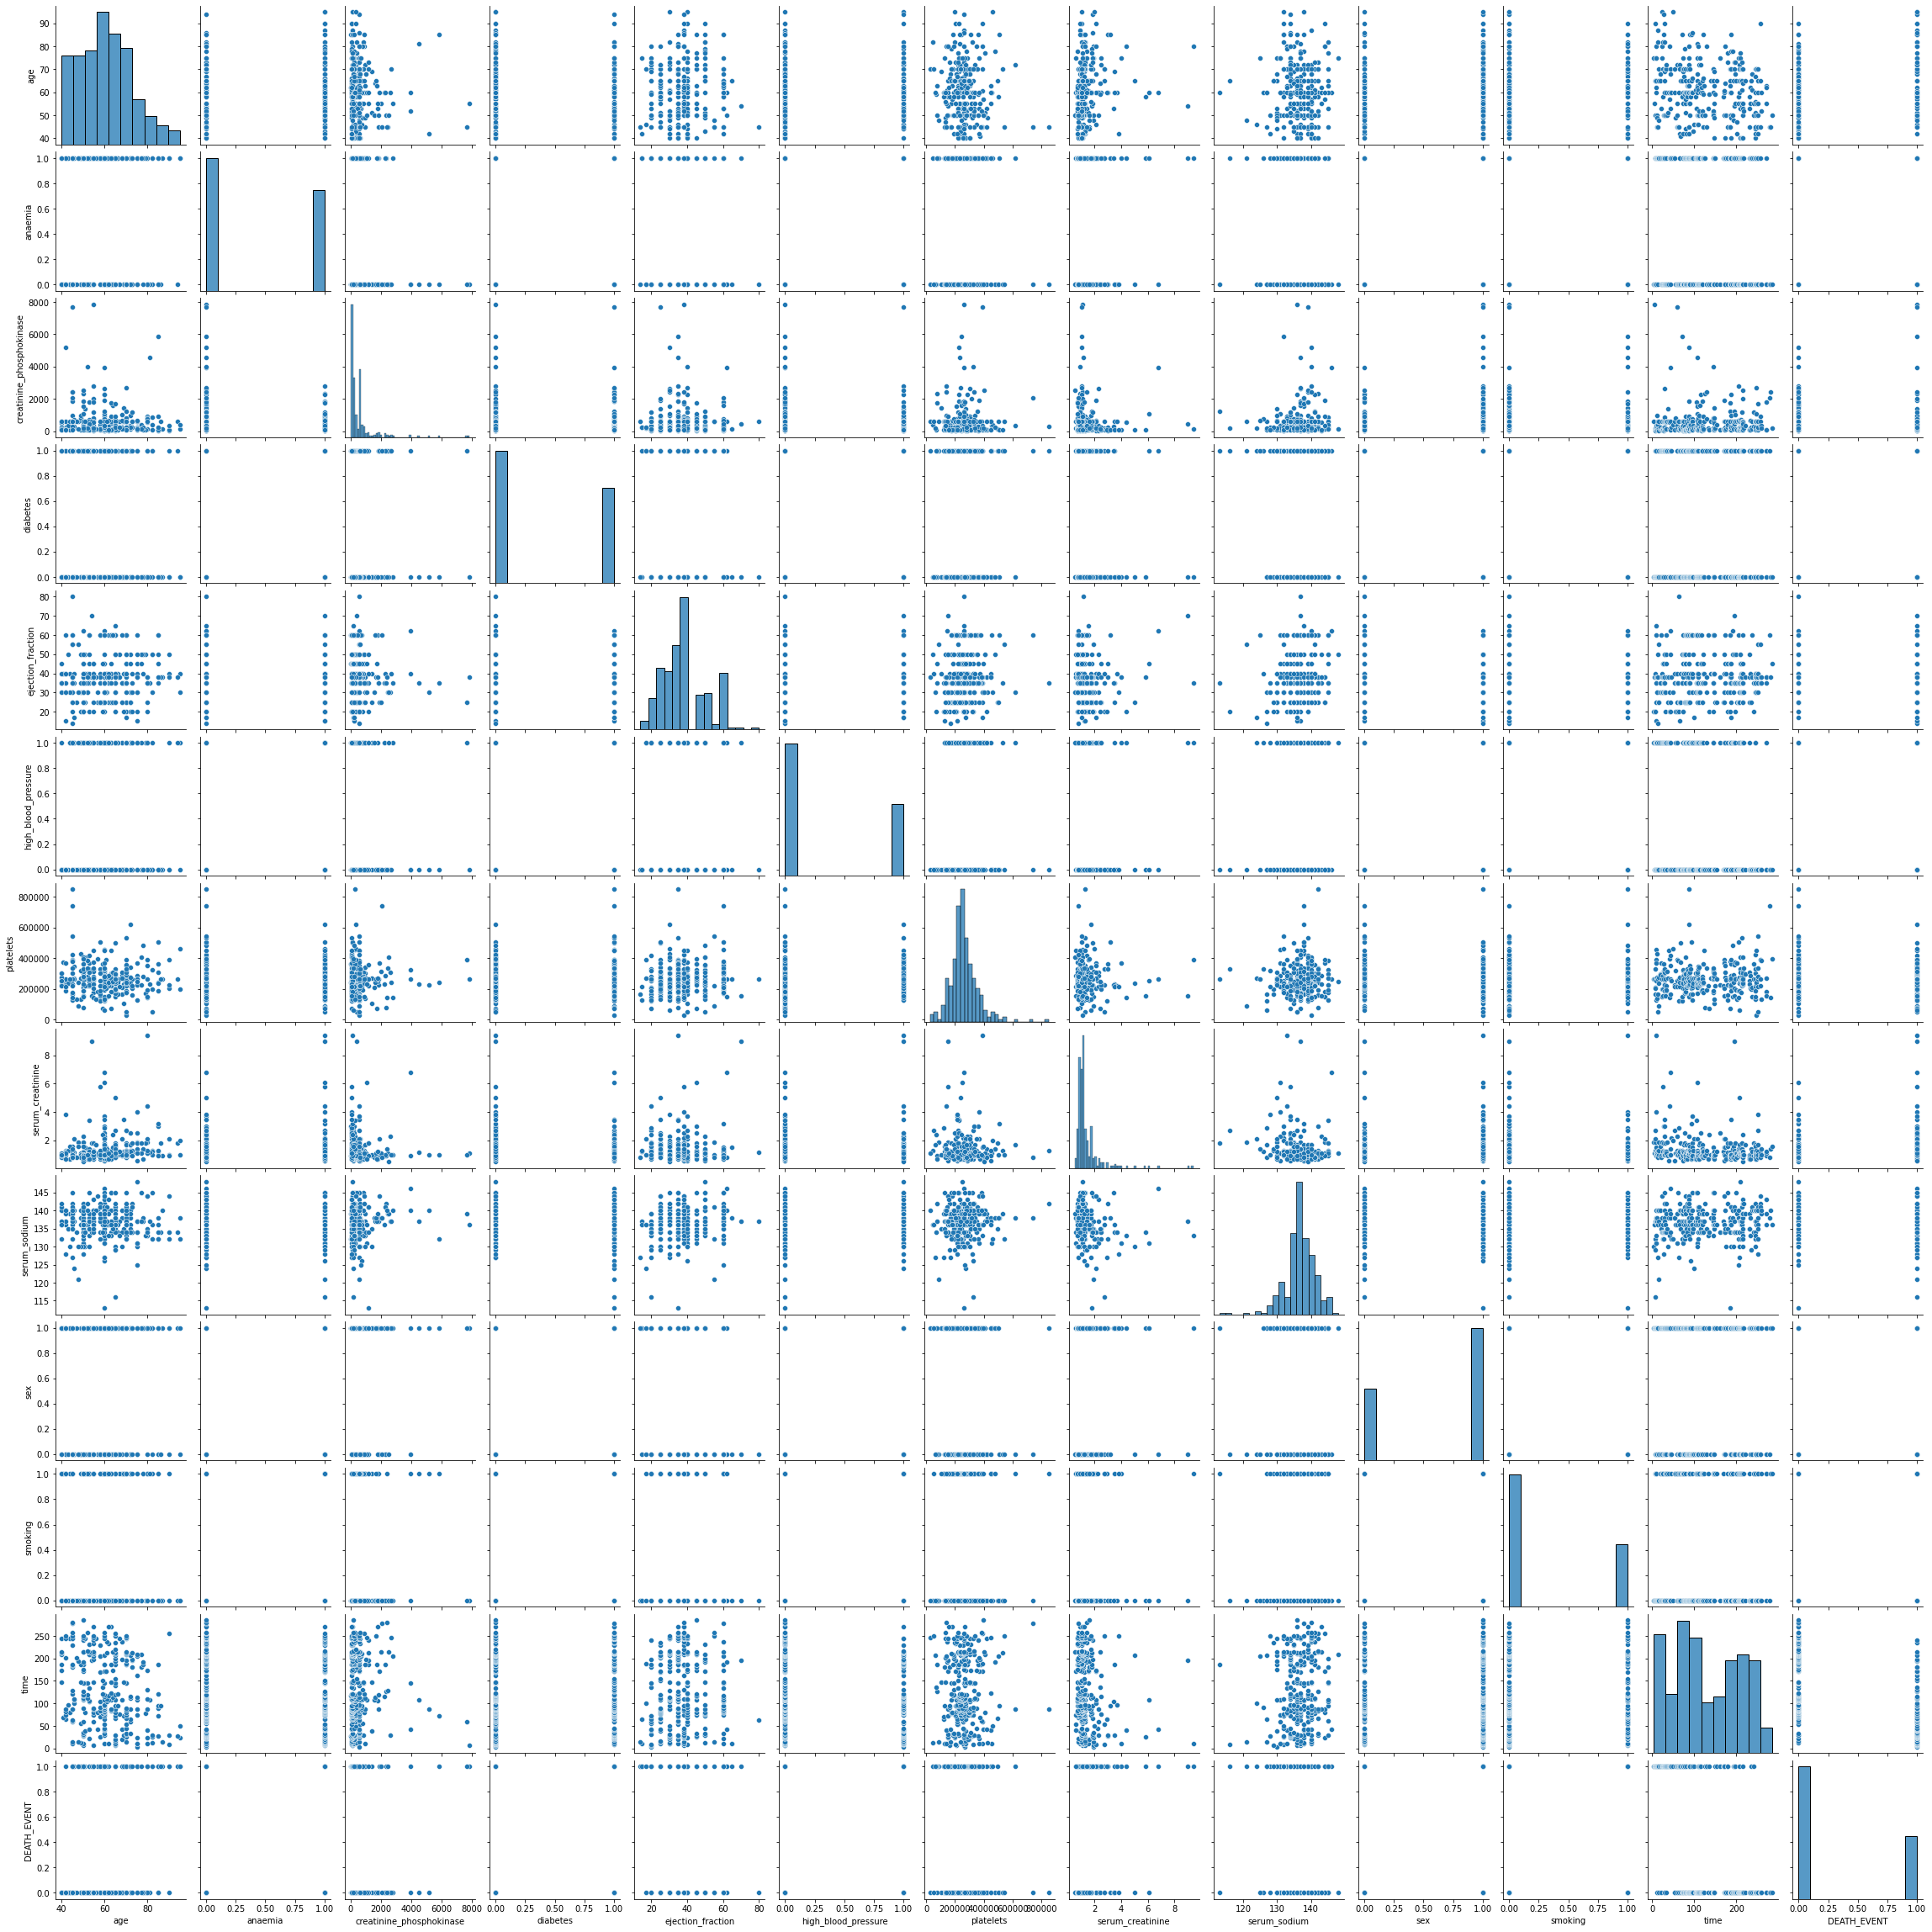

In [7]:
sns.pairplot(df)

# Normalize dataset for ML

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfNoScaled = df.drop(columns=['DEATH_EVENT'])
dataset = sc.fit_transform(dfNoScaled)
dfscaled = pd.DataFrame(dataset)
dfscaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.265205e-16,3.594301e-16,3.713120e-18,1.113936e-16,3.341808e-18,-4.841909e-16,1.009969e-16,-2.227872e-18,-8.627435e-16,-5.940993e-18,-3.861645e-17,-1.069379e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-8.711048e-01,-5.769178e-01,-8.475794e-01,-2.038387e+00,-7.356882e-01,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00
25%,-8.281242e-01,-8.711048e-01,-4.803931e-01,-8.475794e-01,-6.841802e-01,-7.356882e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01
50%,-7.022315e-02,-8.711048e-01,-3.425744e-01,-8.475794e-01,-7.076750e-03,-7.356882e-01,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01
75%,7.718891e-01,1.147968e+00,1.657284e-04,1.179830e+00,5.853888e-01,1.359272e+00,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01
max,2.877170e+00,1.147968e+00,7.514640e+00,1.179830e+00,3.547716e+00,1.359272e+00,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00


In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1, ax2  = axes.flatten()


In [12]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm="l2")
dataNormalized = normalizer.fit_transform(dfscaled) 
dfNormalized = pd.DataFrame(dataNormalized)
dfNormalized

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.327572,-0.239198,0.000046,-0.232738,-0.420278,0.373244,4.617657e-03,0.134565,-0.412995,0.202013,-0.188831,-0.447447
1,-0.062184,-0.110260,0.951169,-0.107283,-0.000896,-0.093120,9.538294e-10,-0.036017,-0.017971,0.093120,-0.087044,-0.202988
2,0.093914,-0.233184,-0.120443,-0.226887,-0.409713,-0.196935,-2.778798e-01,-0.024333,-0.463380,0.196935,0.389261,-0.425834
3,-0.287366,0.361586,-0.153102,-0.266970,-0.482094,-0.231726,-1.721278e-01,0.154358,0.026784,0.231726,-0.216605,-0.501064
4,0.059589,0.194981,-0.073967,0.200393,-0.259964,-0.124956,1.107073e-01,0.214802,-0.795263,-0.230871,-0.116802,-0.268001
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.026616,-0.236106,-0.145736,0.319784,-0.001918,0.368420,-3.007931e-01,-0.077126,0.392224,0.199403,0.394139,0.488811
295,-0.156584,-0.277644,0.407401,-0.270146,-0.002256,-0.234483,2.168129e-02,-0.059833,0.171811,-0.433236,-0.219183,0.578921
296,-0.209125,-0.136622,0.239330,0.185041,0.290926,-0.115383,7.688282e-01,-0.090186,0.048940,-0.213184,-0.107854,0.299041
297,-0.333938,-0.218162,0.473436,-0.212270,-0.001772,-0.184248,-3.164066e-01,0.001484,0.191855,0.184248,0.364184,0.483983


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,whiten=True)
X = pca.fit_transform(dfNormalized)
print("the number of new components: ",pca.n_components_)
print("the components variance: ",pca.explained_variance_)

the number of new components:  11
the components variance:  [0.15922376 0.13039147 0.10402139 0.10198651 0.09217204 0.08424476
 0.07068488 0.06585349 0.06163091 0.05381771 0.04181126]


In [14]:
dfx = pd.DataFrame(X)
dfx.to_csv("/tmp/heart_diseases_normalizedml_dataset.csv", index=False)

# ML models bulding

In [15]:

dfml = pd.read_csv("https://raw.githubusercontent.com/AndresUrregoAngel/BdeB_ml_project/main/data/heart_diseases_normalizedml_dataset.csv")
dfml['target'] = df['DEATH_EVENT']
dfml

,0,1,2,3,4,5,6,7,8,9,10,target
0,0.271825,1.748958,1.794504,-0.569872,-1.022571,1.007827,0.230872,0.343606,0.015183,-0.800532,-0.119390,1
1,0.299914,-0.104510,0.216331,-0.488613,-0.408316,0.228011,0.679739,-0.919592,-0.336963,-1.632032,4.194219,1
2,1.506963,0.844243,1.461389,0.330488,-0.645293,0.468199,1.000290,-0.566929,0.792519,1.173345,-0.141543,1
3,0.340502,0.702235,0.296973,1.886516,-0.365747,1.578287,1.116629,-1.369747,0.021449,-1.077472,-0.921097,1
4,-0.612346,0.429359,2.028439,1.181143,-0.515302,-0.021492,1.168478,1.096550,1.610725,0.260589,0.421343,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.644309,-0.520068,-0.072147,-0.955336,1.253633,-0.189514,-2.427295,-0.127660,-1.061087,1.351143,-0.700185,0
295,-0.426088,-1.753354,-0.956082,-0.836472,-1.409148,0.643053,0.193442,0.391699,-0.665629,0.416330,1.733310,0
296,-0.765269,-1.373010,-0.539429,-0.983201,0.769235,-0.697584,1.330184,1.769980,-0.138156,-1.294171,0.894680,0
297,1.402979,-1.399799,-0.794812,-0.455243,-0.143428,0.577091,-0.754084,-0.611575,-0.026462,0.456442,2.077824,0
